# Introduction

In [1]:
!pip install selenium

In [2]:
from selenium import webdriver

In [3]:
import os
os.getcwd()

'/Users/skathirmani/Projects/manipal/ds-batch6'

## Open any URL

In [4]:
browser = webdriver.Chrome('/Users/Softwares/chromedriver')

In [5]:
url = 'https://en.wikipedia.org/wiki/Data_science'
browser.get(url)

## Scrape paragraphs

In [6]:
ptags = browser.find_elements_by_css_selector('p')
len(ptags)

18

In [11]:
ptags_texts = ''
for tag in ptags:
    #print(tag.text)
    text = tag.text
    ptags_texts = ptags_texts + ' ' + text
len(ptags_texts)

11799

In [16]:
ptags_text = ' '.join([tag.text for tag in ptags])
len(ptags_text)

11798

In [ ]:
!pip install wordcloud

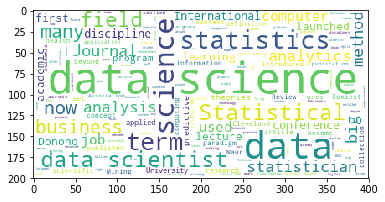

In [18]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white').generate(ptags_text)
plt.imshow(wc)

## Exercise
- Scrape article from https://bbc.in/2Ul1Ooj 
- Create a wordcloud to understand most frequently used words

In [23]:
browser.get('https://bbc.in/2Ul1Ooj')

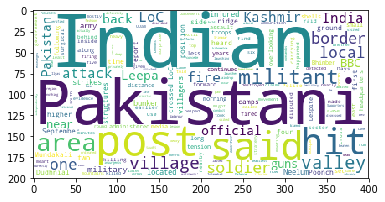

In [24]:
ptags = browser.find_elements_by_css_selector('p')
ptags_text = ' '.join([tag.text for tag in ptags])
wc = WordCloud(background_color='white').generate(ptags_text)
plt.imshow(wc)

In [52]:
browser.get('http://localhost:8000')

In [32]:
ptags = browser.find_elements_by_css_selector('p')
for tag in ptags:
    print(tag.get_attribute('class'))

batch6
batch6


In [36]:
import pandas as pd
df_paras = pd.DataFrame()
ptags = browser.find_elements_by_css_selector('p')
for tag in ptags:
    #print(tag.text, tag.get_attribute('class'))
    curr_row = {
        'tag_name': 'p',
        'class': tag.get_attribute('class'),
        'text': tag.text
    }
    df_paras = df_paras.append(curr_row, ignore_index=True)
df_paras

,class,tag_name,text
0,batch6,p,Web scraping is a process of collecting inform...
1,batch6,p,We will use selenium to open websites through ...
2,scraping,p,We are learning basics of scraping


In [40]:
ptags = browser.find_elements_by_css_selector('p.article')
len(ptags)
[tag.text for tag in ptags]

['India won the world cup', 'India won the match against Pakistan']

In [46]:
div_tag = browser.find_element_by_css_selector('div.eda')
ptags_eda = div_tag.find_elements_by_css_selector('p.article')
len(ptags_eda)
[tag.text for tag in ptags_eda]

['we will be learning univariate analysis',
 'we will also learn bivariate analysis']

In [48]:
div_tag = browser.find_element_by_css_selector('div[name="ml"]')
ptags_ml = div_tag.find_elements_by_css_selector('p')
[tag.get_attribute('value') for tag in ptags_ml]

['regression', 'classification']

In [55]:
## Method 1
ptags_titles = browser.find_elements_by_css_selector('p[name="title"]')
titles = [tag.text for tag in ptags_titles]

ptags_contents = browser.find_elements_by_css_selector('p[name="content"]')
contents = [tag.text for tag in ptags_contents]

pd.DataFrame({'title': titles,
              'content': contents})

## This method is not preferred

,title,content
0,India wins australia,India won australia by 60 runs in their first ...
1,AI is the new era,AI is going to rule the world in next few decades


In [58]:
## Method 2
articles_parent = browser.find_element_by_css_selector('div.articles')
articles_tags = articles_parent.find_elements_by_css_selector('div.article')
df_articles = pd.DataFrame()
for tag in articles_tags:
    title = tag.find_element_by_css_selector('p[name="title"]').text
    content = tag.find_element_by_css_selector('p[name="content"]').text
    row = {'title': title, 'content': content}
    df_articles = df_articles.append(row, ignore_index=True)
df_articles

,content,title
0,India won australia by 60 runs in their first ...,India wins australia
1,AI is going to rule the world in next few decades,AI is the new era
